In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import custom modules
import read_data_lib as rd

### Read data

In [2]:
# Data path
data_path = 'data/mgp93_data_genus.tsv'
metadata_path = 'data/mgp93_metadata.csv'

In [3]:
df_raw_data, df_raw_metadata, metadata_descr = rd.read_raw_data(data_path, metadata_path)
df_data = rd.merge_data(df_raw_data, df_raw_metadata)

### Plot

In [4]:
# Select data for a certain subject and sample location
df_data_F_gut = df_data[((df_data.host_individual == 'F4') | (df_data['host_individual'].isnull()))
                       & ((df_data.common_sample_site == 'feces') | (df_data['common_sample_site'].isnull()))]

In [9]:
data_range = np.arange(6, 25) # 6 is the first genus
y = df_data_F_gut.loc[1:, df_data_F_gut.columns[data_range]]
time = df_data_F_gut[1:].index.values
legend_list = df_data_F_gut.loc[df_data_F_gut['sample_name'] == 'genus'].loc[:, df_data_F_gut.columns[data_range]].values[0]

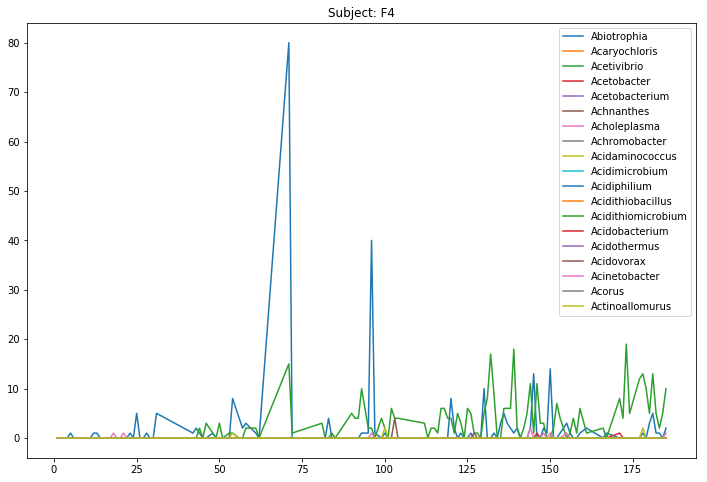

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#ax.set_yscale('log')
plt.plot(time, y)
#plt.ylim([0,20])
plt.legend(legend_list)
plt.title('Subject: F4')
plt.show()